# Data analysis: Covid cases over time

Data analysis of daily new covid cases in different countries, using data from:

https://github.com/CSSEGISandData/COVID-19

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

## Setup

In [2]:
plt.style.use("ggplot")

## Read data

In [3]:
df = pd.read_csv("time_series_covid19_confirmed_global.csv")

In [4]:
df.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,118645,118799,118975,119142,119323,119486,119642,119805,119992,120174


## Remove unused columns

In [5]:
df = df.drop(["Lat", "Long"], axis=1)

In [6]:
df.head(3)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214
1,NaN,Albania,0,0,0,0,0,0,0,0,...,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,118645,118799,118975,119142,119323,119486,119642,119805,119992,120174


## Convert from wide format to long

In [7]:
df = df.melt(id_vars=["Province/State", "Country/Region"], var_name="Date", value_name="Cases")

In [8]:
df.head(3)

,Province/State,Country/Region,Date,Cases
0,NaN,Afghanistan,1/22/20,0
1,NaN,Albania,1/22/20,0
2,NaN,Algeria,1/22/20,0


## Make values in date column proper dates

In [9]:
df.dtypes

Province/State    object
Country/Region    object
Date              object
Cases              int64
dtype: object

In [10]:
df["Date"] = pd.to_datetime(df["Date"])

In [11]:
df.dtypes

Province/State            object
Country/Region            object
Date              datetime64[ns]
Cases                      int64
dtype: object

In [12]:
df.head(3)

,Province/State,Country/Region,Date,Cases
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Albania,2020-01-22,0
2,NaN,Algeria,2020-01-22,0


## Sum provinces, aggregate to country level

In [13]:
df[(df["Country/Region"] == "United Kingdom") & 
   (df["Date"] == datetime(2021, 1, 1))]

,Province/State,Country/Region,Date,Cases
94783,Anguilla,United Kingdom,2021-01-01,13
94784,Bermuda,United Kingdom,2021-01-01,604
94785,British Virgin Islands,United Kingdom,2021-01-01,86
94786,Cayman Islands,United Kingdom,2021-01-01,338
94787,Channel Islands,United Kingdom,2021-01-01,3059
94788,Falkland Islands (Malvinas),United Kingdom,2021-01-01,29
94789,Gibraltar,United Kingdom,2021-01-01,2212
94790,Isle of Man,United Kingdom,2021-01-01,377
94791,Montserrat,United Kingdom,2021-01-01,13
94792,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,2021-01-01,4


In [14]:
df = df.groupby(["Country/Region", "Date"], as_index=False).sum()

In [15]:
df[(df["Country/Region"] == "United Kingdom") &
   (df["Date"] == datetime(2021, 1, 1))]

,Country/Region,Date,Cases
83337,United Kingdom,2021-01-01,2549693


## Index by date and country

In [16]:
df = df.set_index(["Date", "Country/Region"]).sort_index()

In [17]:
df.head(3)

Cases
Date       Country/Region       
2020-01-22 Afghanistan         0
           Albania             0
           Algeria             0

## Convert cumulative total to daily new cases

In [18]:
df.loc[(pd.date_range(datetime(2021, 1, 1), datetime(2021, 1, 3)), ["Poland"]), :]

,,Cases
Date,Country/Region,
2021-01-01,Poland,1305774
2021-01-02,Poland,1312780
2021-01-03,Poland,1318562


In [19]:
df = df.groupby("Country/Region").apply(lambda df: df.diff())

In [20]:
df.head(3)

Cases
Date       Country/Region       
2020-01-22 Afghanistan       NaN
           Albania           NaN
           Algeria           NaN

## Analyze the data

In [21]:
date_from = datetime(2021, 1, 1)
date_to   = datetime(2021, 4, 22)

countries = sorted([
    "Poland",
    "Czechia",
    "Germany",
    "Austria"
])

### Day by day plot

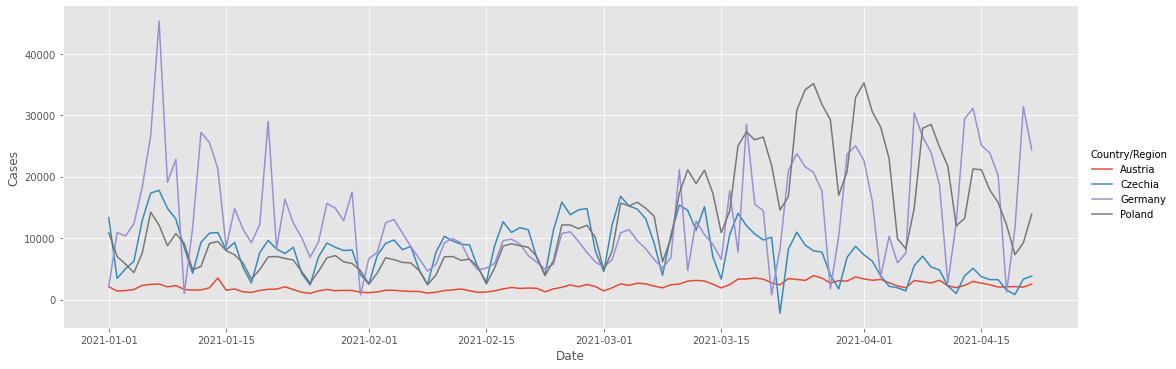

In [22]:
def cases_day_by_day():
    date_range = pd.date_range(date_from, date_to)

    return (
        df.copy()
        .loc[(date_range, countries), :]
    )

sns.relplot(data=cases_day_by_day(), x="Date", y="Cases", hue="Country/Region", kind="line", aspect=3)

### Week by week plot

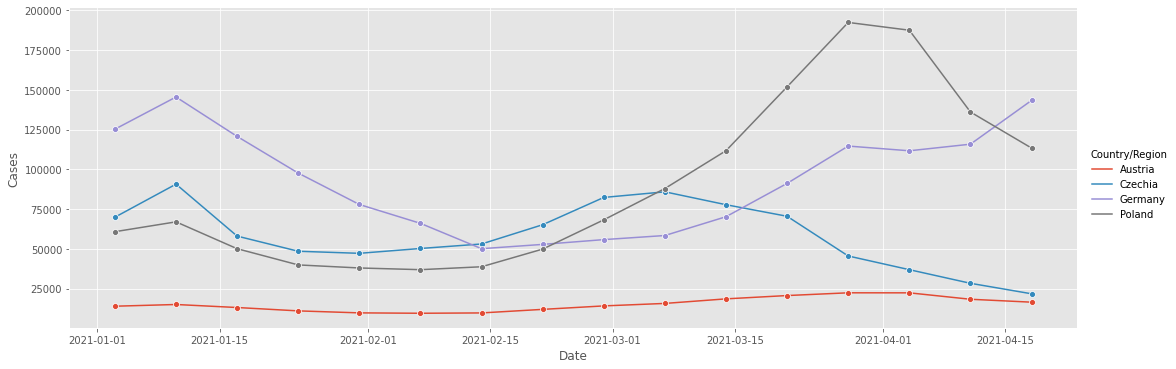

In [23]:
def cases_week_by_week():
    def week_start(dt):
        return dt - timedelta(days=dt.weekday())

    date_range = pd.date_range(week_start(date_from), week_start(date_to), closed="left")

    return (
        df.copy()
        .loc[(date_range, countries), :]
        .groupby("Country/Region")
        .resample("1W", level=0)
        .sum()
    )

sns.relplot(data=cases_week_by_week(), x="Date", y="Cases", hue="Country/Region", kind="line", marker="o", aspect=3)

### 7 day moving average plot

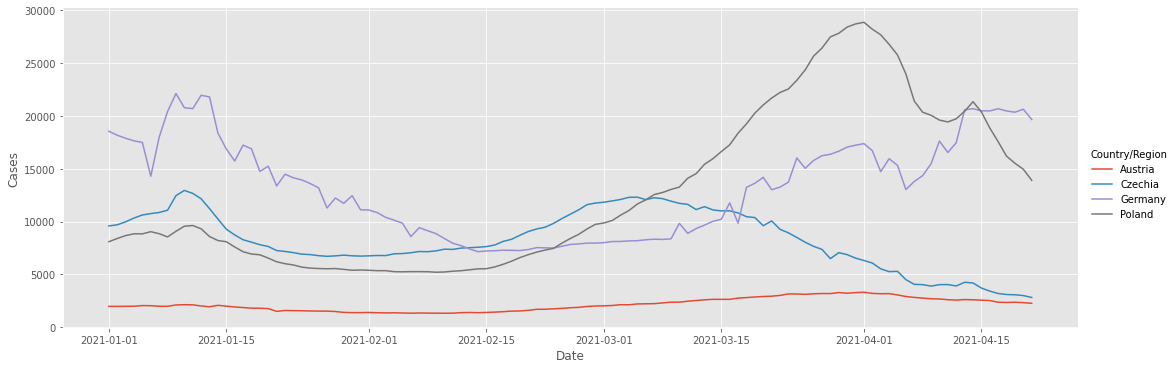

In [27]:
def cases_moving_average(days):
    plot_date_range = pd.date_range(date_from, date_to)
    # You need more days than will be presented to compute the moving average
    moving_window_date_range = pd.date_range(date_from - timedelta(days=days), date_to)

    return (
        df.copy()
        .loc[(moving_window_date_range, countries), :]
        .groupby("Country/Region")
        .apply(lambda df: df.rolling(days).mean())
        .loc[(plot_date_range, countries), :]
    )

sns.relplot(data=cases_moving_average(7), x="Date", y="Cases", hue="Country/Region", kind="line", aspect=3)